<a href="https://colab.research.google.com/github/Rogerio-mack/data-engineering/blob/main/How_API_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://storage.googleapis.com/pr-newsroom-wp/1/2018/11/Spotify_Logo_RGB_Green-768x231.png" width=250, align="center">



# Using the original Spotify API

In [ ]:
import requests
import base64

# Suas credenciais do Spotify
client_id = "771e47fec809492e9f8f64a3a3eeb4d2"
client_secret = "d29350e650dc48a094ddea7b72199372"

# Passo 1: Obter o token de acesso
auth_url = 'https://accounts.spotify.com/api/token'
auth_headers = {
    'Authorization': 'Basic ' + base64.b64encode(f'{client_id}:{client_secret}'.encode()).decode()
}
auth_data = {
    'grant_type': 'client_credentials'
}

auth_response = requests.post(auth_url, headers=auth_headers, data=auth_data)
auth_response_data = auth_response.json()
access_token = auth_response_data['access_token']

# Passo 2: Buscar o artista pelo nome
artist_name = input('Entre com o nome do artista: ')

search_url = f'https://api.spotify.com/v1/search?q={artist_name}&type=artist&limit=1'
search_headers = {
    'Authorization': f'Bearer {access_token}'
}

search_response = requests.get(search_url, headers=search_headers)
search_results = search_response.json()

# Passo 3: Recuperar o Spotify ID do artista
if search_results['artists']['items']:
    artist = search_results['artists']['items'][0]
    artist_name = artist['name']
    artist_id = artist['id']
    print(f"O Spotify ID do artista {artist_name} é: {artist_id}")
else:
    print("Artista não encontrado.")


Entre com o nome do artista: Miles Davis
O Spotify ID do artista Miles Davis é: 0kbYTNQb4Pb1rPbbaF0pT4


In [ ]:
search_url = f'https://api.spotify.com/v1/artists/{artist_id}'
search_headers = {
    'Authorization': f'Bearer {access_token}'
}

search_response = requests.get(search_url, headers=search_headers)
search_results = search_response.json()
search_results

{'external_urls': {'spotify': 'https://open.spotify.com/artist/0kbYTNQb4Pb1rPbbaF0pT4'},
 'followers': {'href': None, 'total': 2556182},
 'genres': ['cool jazz',
  'hard bop',
  'jazz',
  'jazz fusion',
  'jazz trumpet',
  'soul',
  'vocal jazz'],
 'href': 'https://api.spotify.com/v1/artists/0kbYTNQb4Pb1rPbbaF0pT4',
 'id': '0kbYTNQb4Pb1rPbbaF0pT4',
 'images': [{'height': 1000,
   'url': 'https://i.scdn.co/image/423e826b3c1b23930a255d7cbc2daf733f795507',
   'width': 1000},
  {'height': 640,
   'url': 'https://i.scdn.co/image/a318c54208af38364d131a54ced2416423696018',
   'width': 640},
  {'height': 200,
   'url': 'https://i.scdn.co/image/8496e6ea230dd47311d85dcf860015792f5ada42',
   'width': 200},
  {'height': 64,
   'url': 'https://i.scdn.co/image/b1af952a7fb8ac2c4467868d61b5752fc1a01cf0',
   'width': 64}],
 'name': 'Miles Davis',
 'popularity': 61,
 'type': 'artist',
 'uri': 'spotify:artist:0kbYTNQb4Pb1rPbbaF0pT4'}

In [ ]:
dict(search_results)['name']

'Miles Davis'

In [ ]:
genres = dict(search_results)['genres']
genres_text = ', '.join(genres)
genres_text

'cool jazz, hard bop, jazz, jazz fusion, jazz trumpet, soul, vocal jazz'

In [ ]:
df = pd.json_normalize(dict(search_results),['images'])
df

,height,url,width
0,1000,https://i.scdn.co/image/423e826b3c1b23930a255d...,1000
1,640,https://i.scdn.co/image/a318c54208af38364d131a...,640
2,200,https://i.scdn.co/image/8496e6ea230dd47311d85d...,200
3,64,https://i.scdn.co/image/b1af952a7fb8ac2c446786...,64


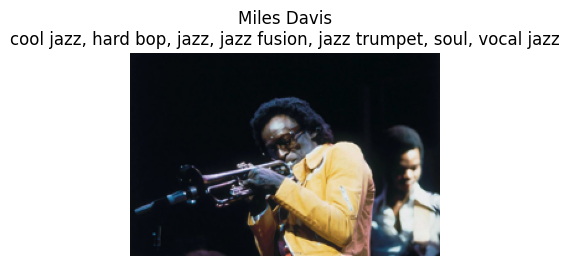

In [ ]:
plt.figure(figsize=(4,4))
response = requests.get(df.iloc[0,1])
img = Image.open(BytesIO(response.content))
width, height = img.size
img = img.resize((width//4, height//4))

plt.imshow(img)
plt.axis('off')
plt.title(dict(search_results)['name'] + '\n' + genres_text)
plt.show()

In [ ]:
search_url = f'https://api.spotify.com/v1/artists/{artist_id}/top-tracks'
search_headers = {
    'Authorization': f'Bearer {access_token}'
}

search_response = requests.get(search_url, headers=search_headers)
search_results = search_response.json()
search_results

{'tracks': [{'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0kbYTNQb4Pb1rPbbaF0pT4'},
      'href': 'https://api.spotify.com/v1/artists/0kbYTNQb4Pb1rPbbaF0pT4',
      'id': '0kbYTNQb4Pb1rPbbaF0pT4',
      'name': 'Miles Davis',
      'type': 'artist',
      'uri': 'spotify:artist:0kbYTNQb4Pb1rPbbaF0pT4'}],
    'available_markets': ['AR',
     'AU',
     'AT',
     'BE',
     'BO',
     'BR',
     'BG',
     'CA',
     'CL',
     'CO',
     'CR',
     'CY',
     'CZ',
     'DK',
     'DO',
     'DE',
     'EC',
     'EE',
     'SV',
     'FI',
     'FR',
     'GR',
     'GT',
     'HN',
     'HK',
     'HU',
     'IS',
     'IE',
     'IT',
     'LV',
     'LT',
     'LU',
     'MY',
     'MT',
     'MX',
     'NL',
     'NZ',
     'NI',
     'NO',
     'PA',
     'PY',
     'PE',
     'PH',
     'PL',
     'PT',
     'SG',
     'SK',
     'ES',
     'SE',
     'CH',
     'TW',
     'TR',
     'UY',
     'US',
     'GB',
 

In [ ]:
df = pd.json_normalize(dict(search_results),['tracks'])
df[['name','album.name','album.id']]

,name,album.name,album.id
0,Blue in Green (feat. John Coltrane & Bill Evans),Kind Of Blue (Legacy Edition),4sb0eMpDn3upAFfyi4q2rw
1,"So What (feat. John Coltrane, Cannonball Adder...",Kind Of Blue (Legacy Edition),4sb0eMpDn3upAFfyi4q2rw
2,"Freddie Freeloader (feat. John Coltrane, Canno...",Kind Of Blue (Legacy Edition),4sb0eMpDn3upAFfyi4q2rw
3,"Générique - Bande originale du film ""Ascenseur...",Ascenseur pour l'échafaud,0aoOdlpGLfNCUFhQu7UIs2
4,It Never Entered My Mind,Milestones of a Jazz Legend - Miles Davis and ...,5Xc7DRTmQwhYMT6DAVsEw4
5,My Funny Valentine,The Duke,3ScU6Mwhxpcg6SwE3Z0MzV
6,Autumn Leaves,Grove,6rZ47wbWUC5oEcFWCWmTp4
7,"All Blues (feat. John Coltrane, Cannonball Add...",Kind Of Blue (Legacy Edition),4sb0eMpDn3upAFfyi4q2rw
8,"'Round Midnight (feat. John Coltrane, Red Garl...",'Round About Midnight,4VUawqEDCHHfrUe77ScQ2K
9,"Milestones (feat. John Coltrane, Cannonball Ad...",Milestones,56I4vUYWQ4aXLiyfo8XuZv


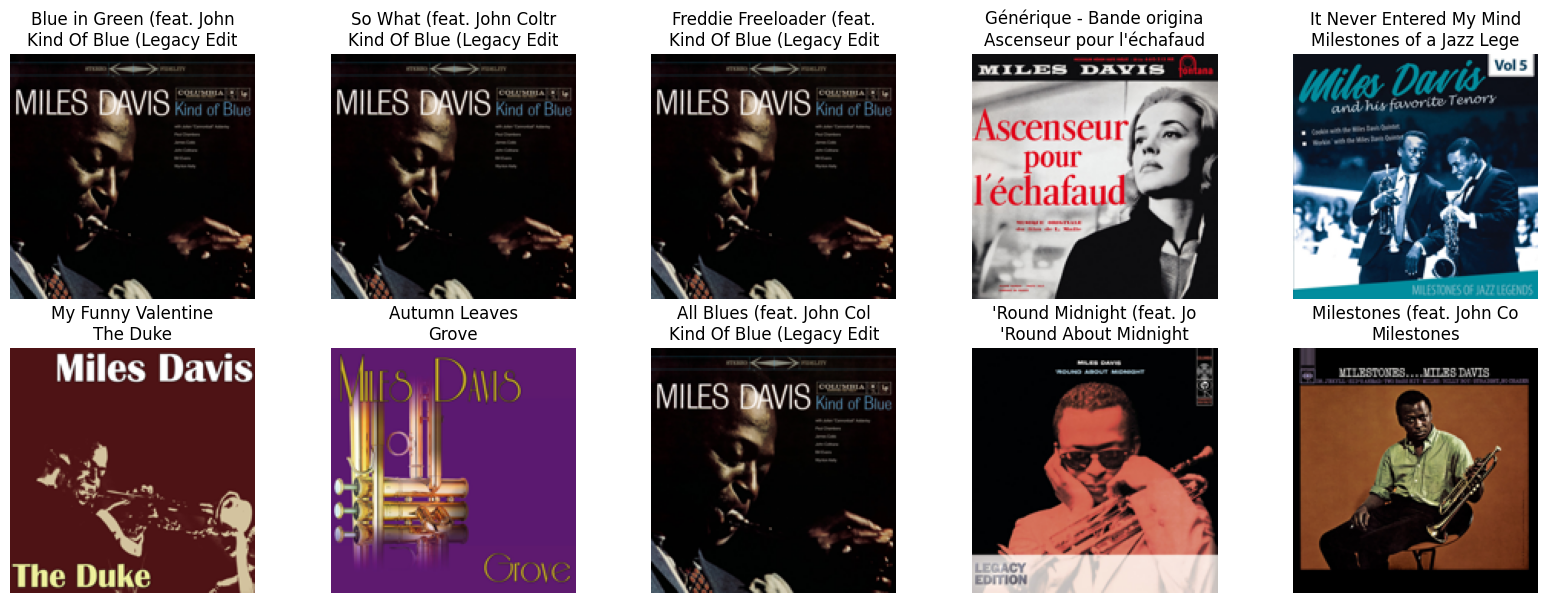

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(20,7))
axis = ax.flatten()
i = 0

for _, row in df.iterrows():

  response = requests.get(row['album.images'][0]['url'])
  img = Image.open(BytesIO(response.content))
  width, height = img.size
  img = img.resize((width//4, height//4))

  axis[i].imshow(img)
  axis[i].axis('off')
  L_name = min(25,len(row['name']))
  L_album = min(25,len(row['album.name']))
  axis[i].set_title(row['name'][0:L_name] + '\n' + row['album.name'][0:L_album])

  i=i+1

plt.show()

# Using a wrapper

In [ ]:
%%capture
!pip install spotipy

In [ ]:
import os
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
%matplotlib inline
import getpass

client_id = "771e47fec809492e9f8f64a3a3eeb4d2"
client_secret = "d29350e650dc48a094ddea7b72199372"

os.environ["SPOTIPY_CLIENT_ID"] = client_id
os.environ["SPOTIPY_CLIENT_SECRET"] = client_secret

artist_name = input('Entre com o nome do artista: ')

# Spotify Auth
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())

# Get artist_top_tracks
results = spotify.search(q='artist:' + artist_name, type='artist',limit=1)

print(f"Name: {dict(results)['artists']['items'][0]['name']} id: {dict(results)['artists']['items'][0]['id']}")
artist_id = dict(results)['artists']['items'][0]['id']

Entre com o nome do artista: Miles Davis
Name: Miles Davis id: 0kbYTNQb4Pb1rPbbaF0pT4


In [ ]:
results = spotify.artist_top_tracks(artist_id)

df = pd.json_normalize(dict(results),['tracks'])
df[['name','album.name','album.id']]

,name,album.name,album.id
0,Blue in Green (feat. John Coltrane & Bill Evans),Kind Of Blue (Legacy Edition),4sb0eMpDn3upAFfyi4q2rw
1,"So What (feat. John Coltrane, Cannonball Adder...",Kind Of Blue (Legacy Edition),4sb0eMpDn3upAFfyi4q2rw
2,"Freddie Freeloader (feat. John Coltrane, Canno...",Kind Of Blue (Legacy Edition),4sb0eMpDn3upAFfyi4q2rw
3,"Générique - Bande originale du film ""Ascenseur...",Ascenseur pour l'échafaud,0aoOdlpGLfNCUFhQu7UIs2
4,It Never Entered My Mind,Milestones of a Jazz Legend - Miles Davis and ...,5Xc7DRTmQwhYMT6DAVsEw4
5,My Funny Valentine,The Duke,3ScU6Mwhxpcg6SwE3Z0MzV
6,Autumn Leaves,Grove,6rZ47wbWUC5oEcFWCWmTp4
7,"All Blues (feat. John Coltrane, Cannonball Add...",Kind Of Blue (Legacy Edition),4sb0eMpDn3upAFfyi4q2rw
8,"'Round Midnight (feat. John Coltrane, Red Garl...",'Round About Midnight,4VUawqEDCHHfrUe77ScQ2K
9,"Milestones (feat. John Coltrane, Cannonball Ad...",Milestones,56I4vUYWQ4aXLiyfo8XuZv


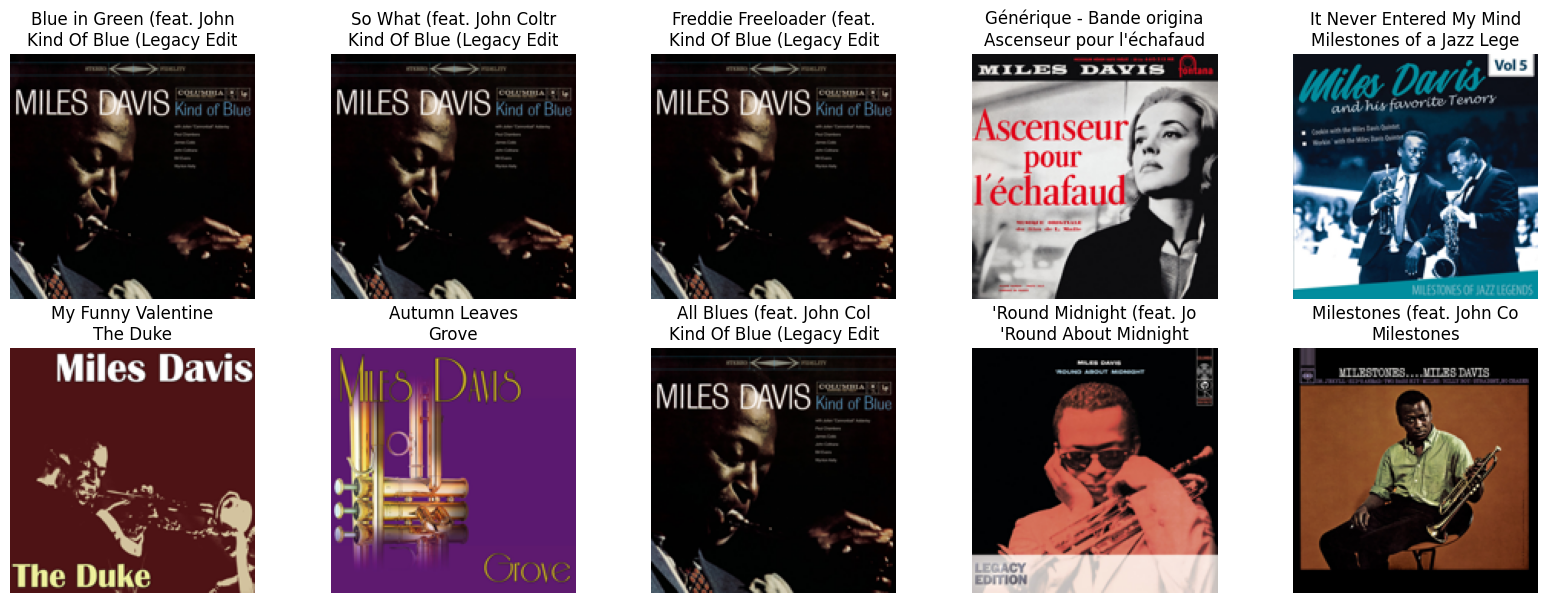

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(20,7))
axis = ax.flatten()
i = 0

for _, row in df.iterrows():

  response = requests.get(row['album.images'][0]['url'])
  img = Image.open(BytesIO(response.content))
  width, height = img.size
  img = img.resize((width//4, height//4))

  axis[i].imshow(img)
  axis[i].axis('off')

  L_name = min(25,len(row['name']))
  L_album = min(25,len(row['album.name']))
  axis[i].set_title(row['name'][0:L_name] + '\n' + row['album.name'][0:L_album])

  i=i+1

plt.show()